In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# بارگیری داده ها
data = pd.read_csv('Dataset.csv')

In [14]:
# حذف ردیف هایی که مقادیر ستون های BMI و Glucose و BloodPressure آنها صفر است
data = data[(data['BMI'] != 0) & (data['Glucose'] != 0) & (data['BloodPressure'] != 0)]
data.dropna()
# mask = (Dataset['BMI'] != 0) & (Dataset['Glucose'] != 0) & (Dataset['BloodPressure'] != 0)
# data = data[mask]

# تبدیل برچسب Outcome به -1 و 1
data['Outcome'] = np.where(data['Outcome'] == 0, -1, 1)
# data['Outcome'] = data['Outcome'].replace({True: 1, False: -1})

In [15]:
# نرمال سازی داده ها با استفاده از Min-Max scaling
data.iloc[:, :-1] = (data.iloc[:, :-1] - data.iloc[:, :-1].min()) / (data.iloc[:, :-1].max() - data.iloc[:, :-1].min())
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.411765,0.748387,0.306122,0.323232,0.206856,0.251534,0.217763,0.300000,1
1,0.294118,0.458065,0.755102,0.000000,0.000000,0.709611,0.055935,0.116667,1
2,0.294118,0.935484,0.408163,0.333333,0.384161,0.265849,0.215628,0.133333,1
3,0.058824,0.832258,0.510204,0.000000,0.000000,0.380368,0.004270,0.283333,1
4,0.352941,0.516129,0.489796,0.000000,0.000000,0.192229,0.123826,0.133333,1
...,...,...,...,...,...,...,...,...,...
762,0.000000,0.858065,0.367347,0.292929,0.565012,0.335378,0.424424,0.000000,1
763,0.058824,0.961290,0.265306,0.161616,0.443262,0.157464,0.246371,0.050000,-1
764,0.058824,0.361290,0.428571,0.151515,0.066194,0.110429,0.251067,0.083333,-1
765,0.294118,0.638710,0.551020,0.000000,0.000000,0.548057,0.047822,0.433333,-1


In [16]:
# تقسیم داده های آموزش و آزمایش
train_size = int(0.85 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

In [25]:
# # تعریف و پیاده سازی دسته بند پرسپترون

class Perceptron:
    def __init__(self, num_features, learning_rate=0.1, max_epochs=100):
#       self.num_features = num_features
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = np.random.randn(num_features)
#       self.weights = np.zeros((num_features,))
        self.bias = np.random.randn()
#       self.bias = 0

    def train(self, X, y):
        for _ in range(self.max_epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                if prediction != y[i]:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]

    def predict(self, x):
        activation = np.dot(self.weights, x) + self.bias
        return np.where(activation >= 0, 1, -1)


In [26]:
# آموزش دسته بند با استفاده از داده های آموزش
perceptron = Perceptron(num_features=8)
perceptron.train(train_data.iloc[:, :-1].values, train_data['Outcome'].values)

In [27]:
# پیش بینی برچسب ها برای داده های تست
test_data_reshaped = test_data.iloc[:, :-1].values.reshape(-1, 8)
predictions = perceptron.predict(test_data.iloc[:, :-1].values.T)

# محاسبه دقت دسته بند
accuracy = (predictions == test_data['Outcome'].values).mean() * 100
print("دقت دسته بند: {:.2f}%".format(accuracy))

دقت دسته بند: 72.48%


In [30]:
# رسم نمودار تغییرات دقت
train_accuracy = []
test_accuracy = []

for epoch in range(perceptron.max_epochs):
    perceptron.train(train_data.iloc[:, :-1].values, train_data['Outcome'].values)
    train_predictions = perceptron.predict(train_data.iloc[:, :-1].values.T)
    train_accuracy.append((train_predictions == train_data['Outcome'].values).mean())
    test_predictions = perceptron.predict(test_data.iloc[:, :-1].values.T)
    test_accuracy.append((test_predictions == test_data['Outcome'].values).mean())



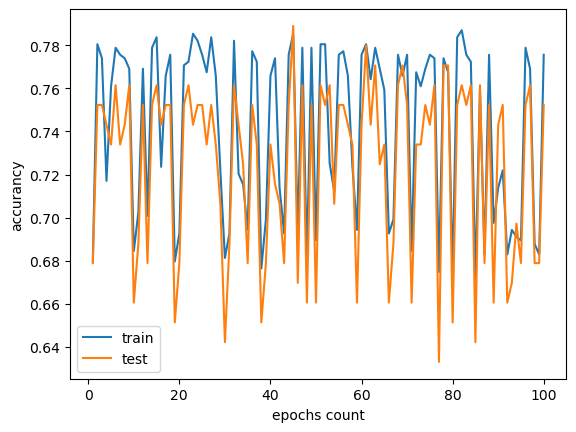

تعداد گام‌ها برای رسیدن به دقت بالای 70%): 1


In [31]:
plt.plot(range(1, perceptron.max_epochs + 1), train_accuracy, label='train')
plt.plot(range(1, perceptron.max_epochs + 1), test_accuracy, label='test')
plt.xlabel('epochs count')
plt.ylabel('accurancy')
plt.legend()
plt.show()


# پیدا کردن تعداد گامها برای رسیدن به دقت بالای 70%
steps_to_70_percent = next(i for i, acc in enumerate(test_accuracy) if acc >= 0.7)
print("تعداد گام‌ها برای رسیدن به دقت بالای 70%): {}".format(steps_to_70_percent))